<h2 style='text-align:center;font-size:80px;background-color:teal;border:80px;color:white'>   Customer Churn Prediction Project . <h2>


In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading the excel file from dataset
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


**The dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so futher we will see whether it is a Classification or Regression model
..**

In [ ]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
df.sample(7)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
75159,75160,Customer_75160,54,Female,New York,22,45.71,148,1
47601,47602,Customer_47602,33,Male,Los Angeles,2,86.86,494,1
10131,10132,Customer_10132,28,Female,Los Angeles,15,40.06,322,0
46530,46531,Customer_46531,62,Male,Los Angeles,24,83.91,205,1
79462,79463,Customer_79463,64,Female,Chicago,22,74.89,101,1
52233,52234,Customer_52234,68,Male,New York,23,47.85,264,0
63965,63966,Customer_63966,29,Male,Chicago,23,87.92,337,1


In [ ]:
df.shape

(100000, 9)

There are 100000 rows and 9 columns in dataset

In [ ]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

 **So here we can see that our target variable is in int64 format which makes it a Regression Model**

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:orange'> EDA <h2>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB



**Here we have 3 columns which are cataagorical , so we will encode categorical column later**


In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**Here We can see that no null value is present in the dataset.. For confirmation we will plot it see it once**

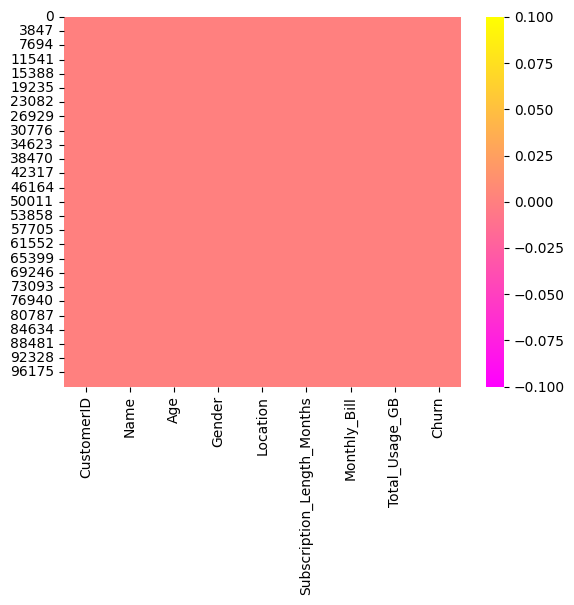

In [ ]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="spring")
plt.show()

**No Missing values or NaN value is present in the dataset**

In [ ]:
# Lets see whether any abnormal value is present in each column
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('---------------------------------------------------------------------------------------')

1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: CustomerID, Length: 100000, dtype: int64



---------------------------------------------------------------------------------------
Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64



---------------------------------------------------------------------------------------
33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56  

**I cant find any abnormal values**

In [ ]:
# Lets Check again Churn Value Count
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

Target variable dont seems to be imbalanced they is a slight difference between 0 and 1

In [ ]:
  # Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)


Categorical columns are:
 ['Name', 'Gender', 'Location']


Numerical columns are:
 ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [5]:
# Lets drop customerID as it is unique ID given to each customer which is of no use in prediction...

df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.head(3)

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,Customer_2,62,Female,New York,1,48.76,172,0
2,Customer_3,24,Female,Los Angeles,5,85.47,460,0


# Visualization

Female    50216
Male      49784
Name: Gender, dtype: int64


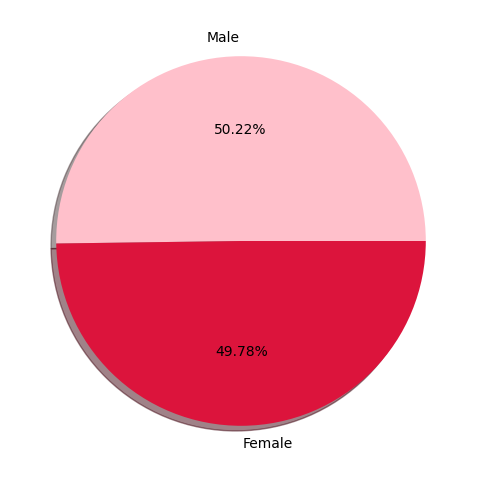

In [ ]:
#Visualize the count of Gender
print(df['Gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,6))
colors=["pink","crimson"]
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()


## So count of both gender are pretty same.. but still male is little bit more than female

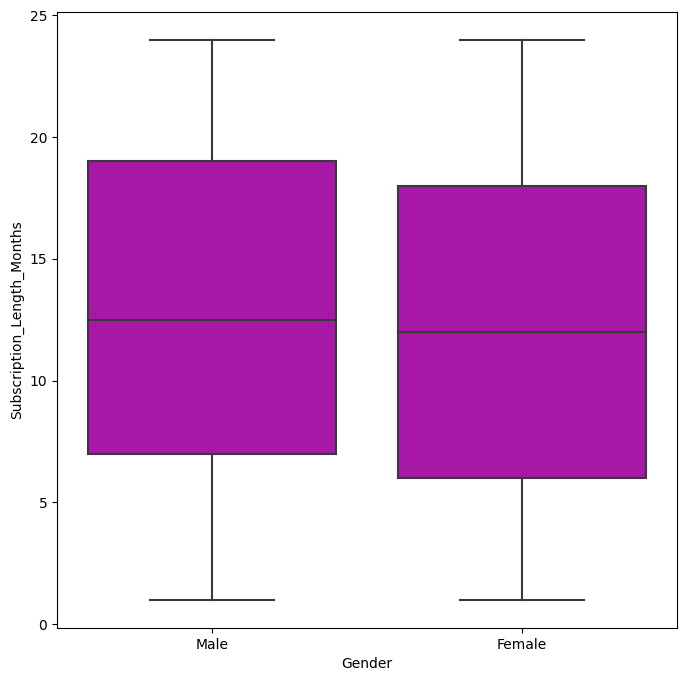

In [9]:
# Comparing Gender and Subscription_Length_Months
plt.figure(figsize=(8,8))
sns.boxplot( x = "Gender",y = "Subscription_Length_Months", data = df,color='m')
plt.show()

Males subscription lenght is more than female

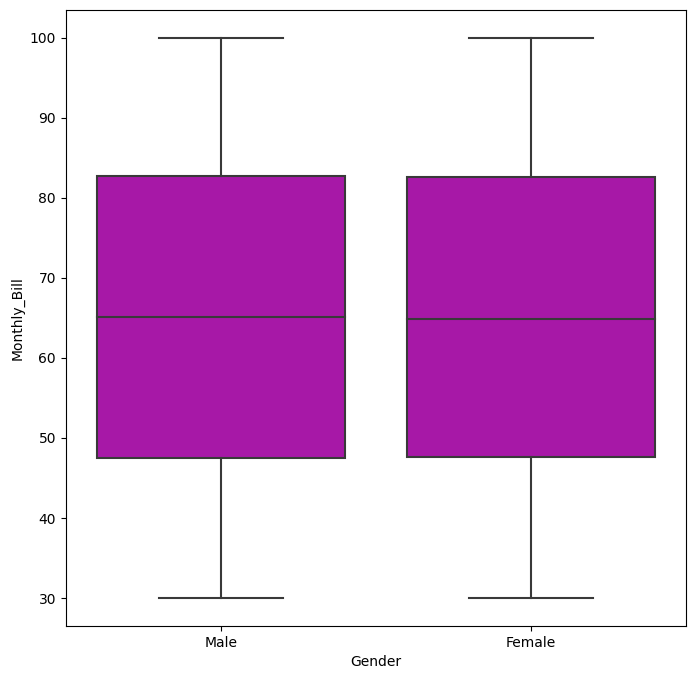

In [10]:
# Comparing Gender and Monthly_Bill
plt.figure(figsize=(8,8))
sns.boxplot( x = "Gender",y = "Monthly_Bill", data = df,color='m')
plt.show()

**Monthly Bills seems to be equal in both male and female**

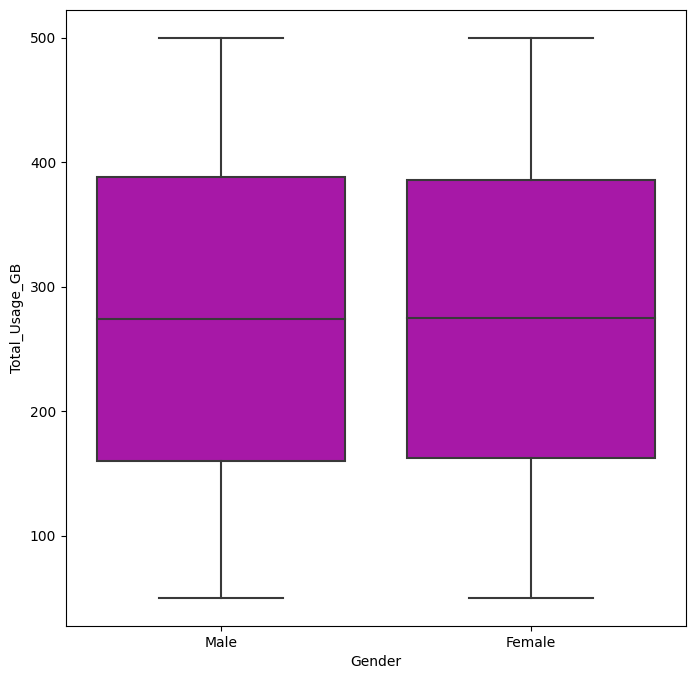

In [11]:
# Comparing Gender and Total_Usage_GB
plt.figure(figsize=(8,8))
sns.boxplot( x = "Gender",y = "Total_Usage_GB", data = df,color='m')
plt.show()

**Total_Usage_GB seems to be Equal in both the gender**

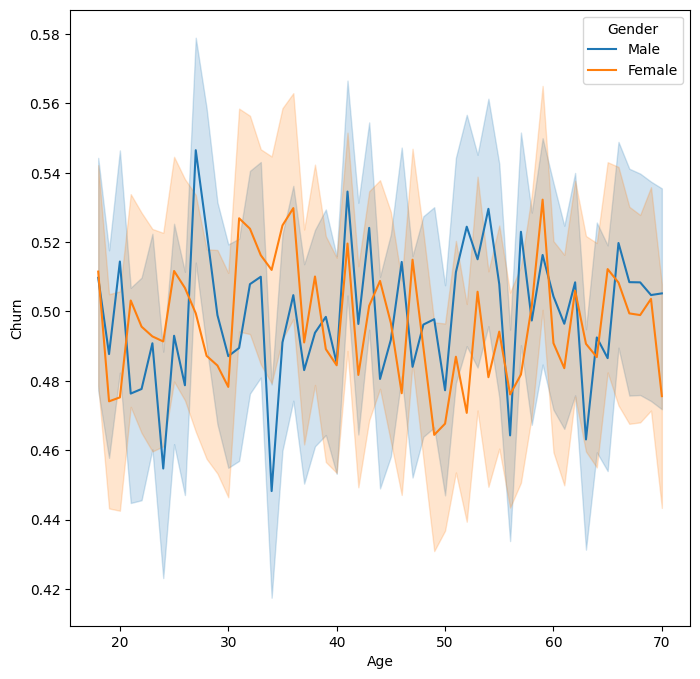

In [17]:
# Comparing Age and Churn and Gender
plt.figure(figsize=(8,8))
sns.lineplot( x = "Age",y = "Churn", data = df,hue= "Gender" ,color='m')
plt.show()

**We can see that the maximum churn can be seen in males during the age group of 25-30**

In [18]:
df.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

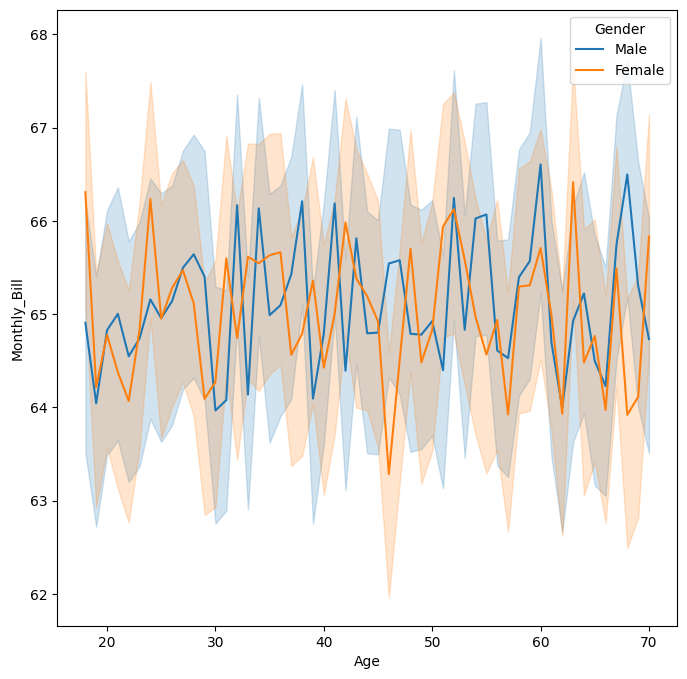

In [19]:
# Comparing Age and Monthly bill and Gender
plt.figure(figsize=(8,8))
sns.lineplot( x = "Age",y = "Monthly_Bill", data = df,hue= "Gender" ,color='m')
plt.show()

We can see that the monthly bill seems to be high in both gender during the certain age groups :- In Female (age) - 20-30 and than 55-65 ,
In Males (age) - 30-43 than 52-70.

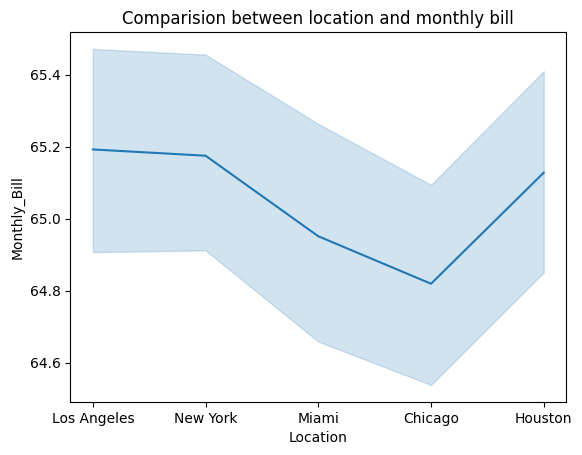

In [27]:
#Comparing Location and Monthly bills
plt.title("Comparision between location and monthly bill")
sns.lineplot( x = "Location",y = "Monthly_Bill", data = df,palette="b")
plt.show()

Here we come to know that Los Angeles has incurred the higgest monthly bills and the lowest have taken place in Chicago

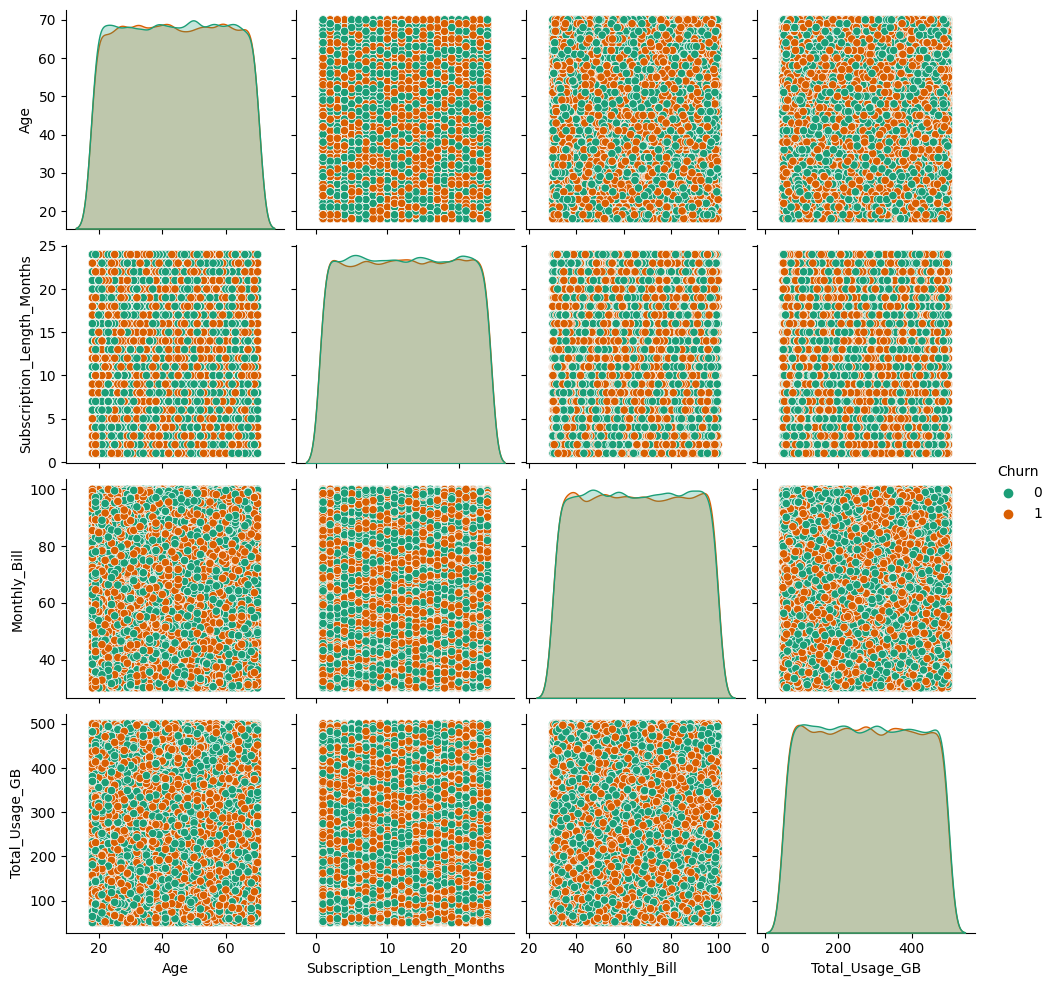

In [29]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

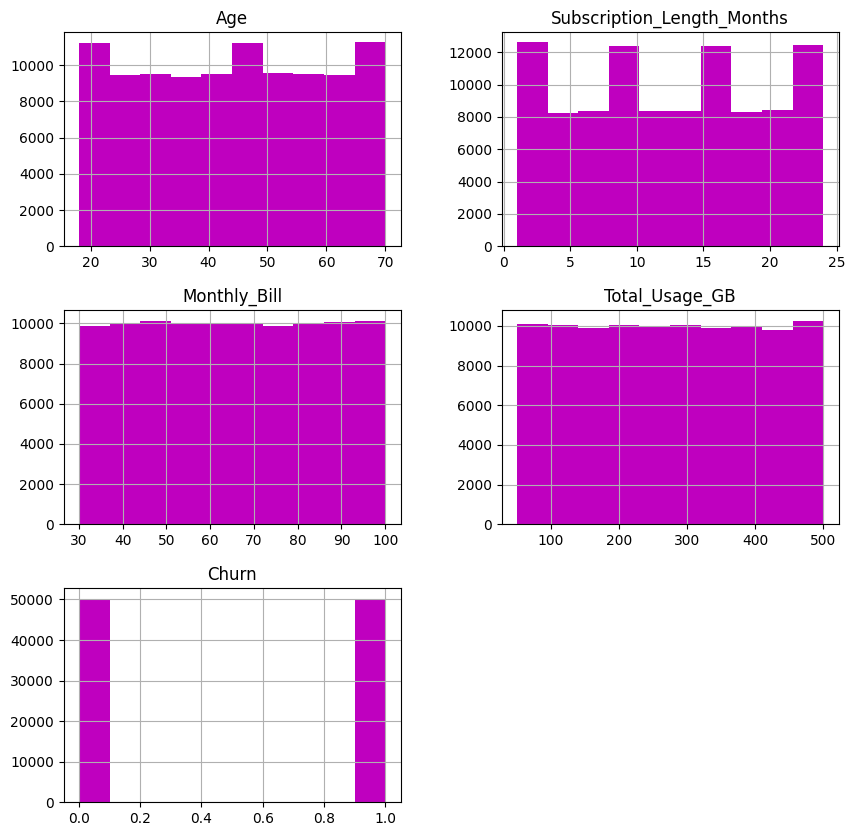

In [30]:
df.hist(bins=10, figsize=(10,10),color='m')
plt.show()

**Its seems that skewness is not present in the dataset**

# CORRELATION

## lets first encode all categorical column

In [31]:
df.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,1,23,55.13,226,1
99996,99997,62,0,4,19,61.65,351,0
99997,99998,64,1,0,17,96.11,251,1
99998,99999,51,0,4,20,49.25,434,1


In [33]:
##Correlation
df.corr()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Name,1.000000,-0.000948,0.003875,-0.004283,0.007357,0.000353,-0.002791,-0.001418
Age,-0.000948,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,0.003875,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,-0.004283,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.007357,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.000353,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.002791,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.001418,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


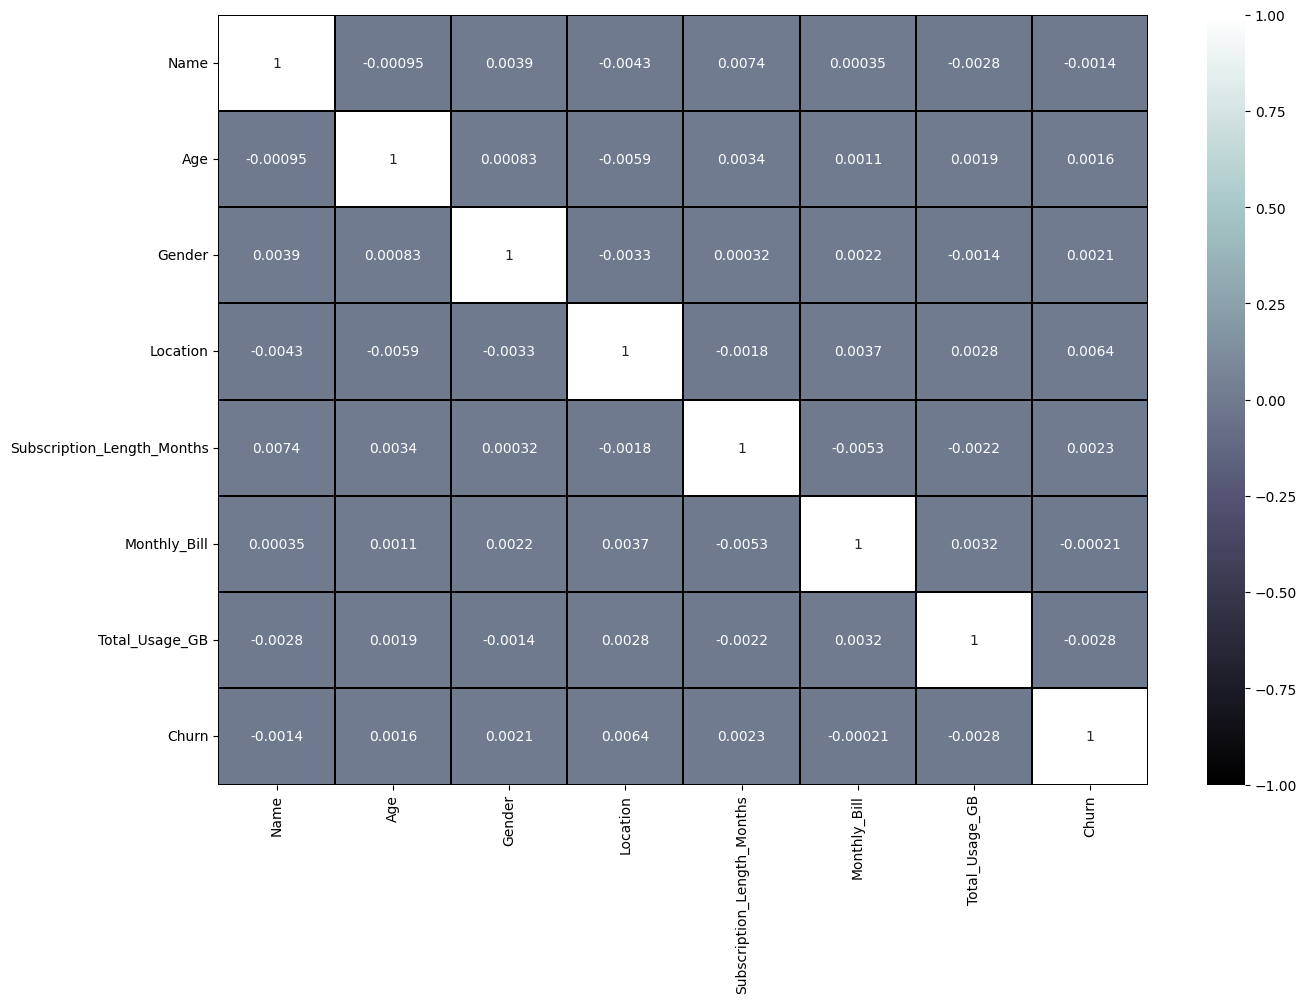

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="bone")
plt.yticks(rotation=0);

## OBSERATION

### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat map contains both positive and negative correlation.

In [35]:
df.corr()['Churn'].sort_values()

Total_Usage_GB               -0.002842
Name                         -0.001418
Monthly_Bill                 -0.000211
Age                           0.001559
Gender                        0.002121
Subscription_Length_Months    0.002328
Location                      0.006405
Churn                         1.000000
Name: Churn, dtype: float64

We can observe positive and negative correlation with target

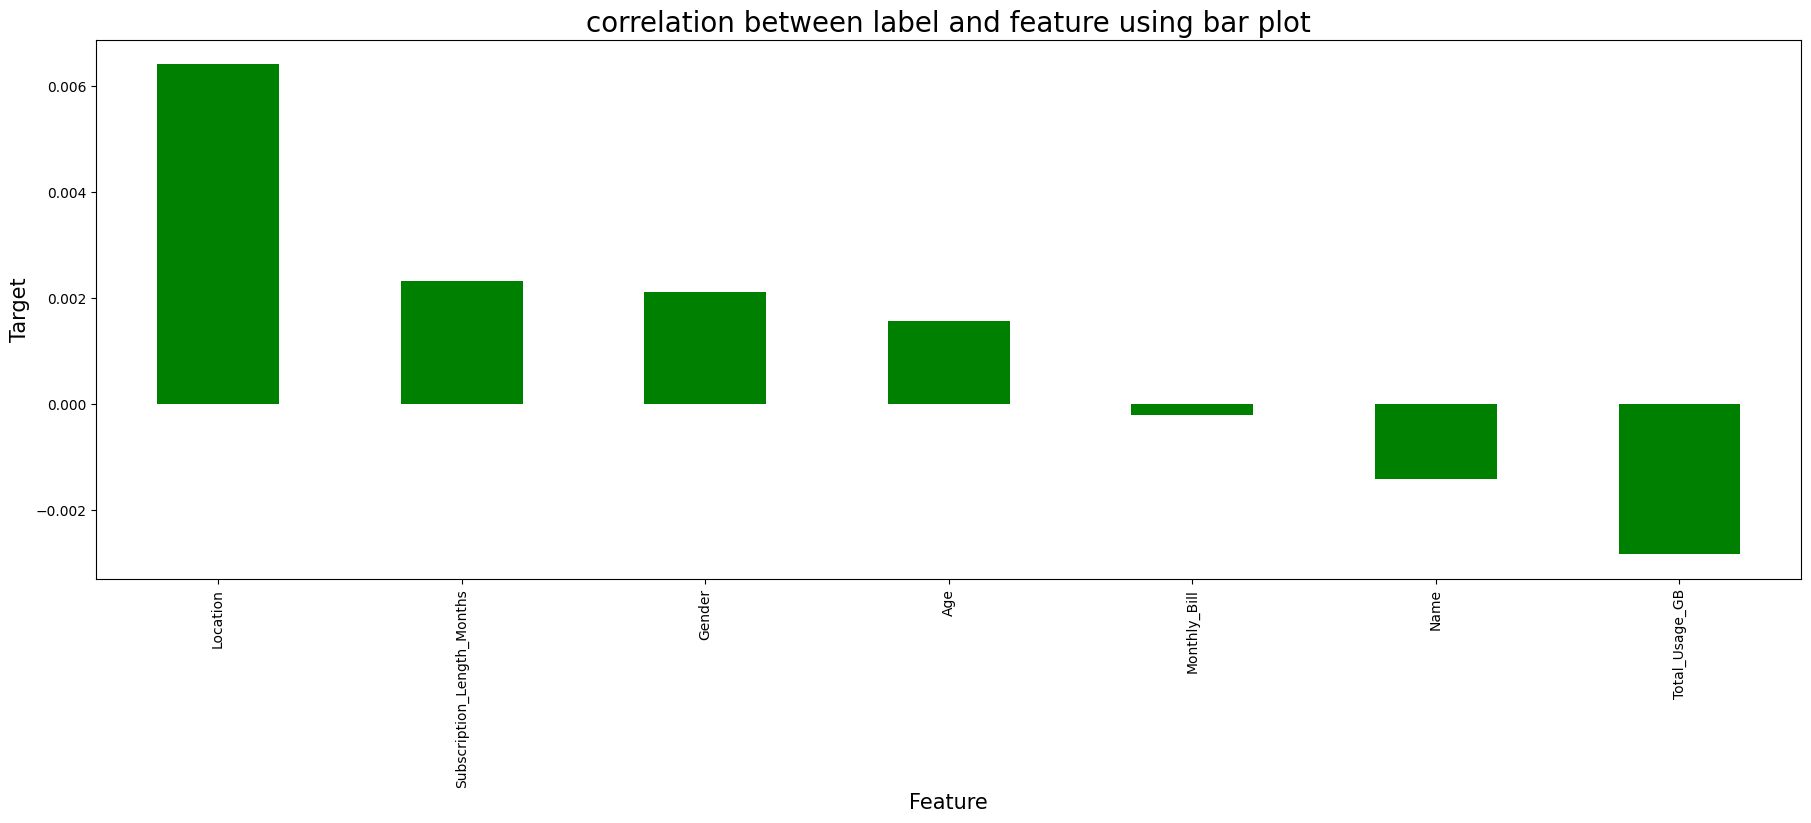

In [36]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="g")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

We can see that Location and Total usage gb is most positively and negatively correlated to target varibale

# DESCRIPTIVE STATISTICS

In [37]:
df.describe()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,44.027020,0.497840,1.995840,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,0.499998,1.411638,6.926461,20.230696,130.463063,0.499998
min,0.000000,18.000000,0.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,24999.750000,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,49999.500000,44.000000,0.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,74999.250000,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,99999.000000,70.000000,1.000000,4.000000,24.000000,100.000000,500.000000,1.000000


#### Observation:
- This gives the statistical information of the numerical columns. The summary of this dataset looks perfect since there is no negative/ invalid values present.

- From the above description we can observe the following things.

- The counts of all the 4 columns are same which means there are no missing values in the dataset.

- If mean value is greater than the median(50%) in columns which means the data is skewed to right in these columns.

- The data in the column  have mean value less than median that means the data is skewed to left.

- We can also notice the Standard deviation, min, 25% percentile values from this describe method.

# Now Lets Remove Outliers Now


In [39]:
df.dtypes

Name                            int64
Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [40]:
# Features containing outliers from Numerical Columns

features = df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1.241670,0.651115,0.410606,0.294289
1,1.176226,1.658879,0.805374,0.784852
2,1.310651,1.081380,1.009204,1.422681
3,0.525321,1.370129,1.625597,0.173279
4,0.129120,0.939864,0.341720,0.064338
...,...,...,...,...
99995,0.721654,1.517363,0.490504,0.370939
99996,1.176226,0.939864,0.168220,0.587191
99997,1.307115,0.651115,1.535140,0.179313
99998,0.456341,1.084239,0.781153,1.223390


In [41]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)]
df_new

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,1,23,55.13,226,1
99996,99997,62,0,4,19,61.65,351,0
99997,99998,64,1,0,17,96.11,251,1
99998,99999,51,0,4,20,49.25,434,1


In [42]:
df_new.shape


(100000, 8)

In [43]:
df.shape


(100000, 8)

So we can see that no Outlier is present in the dataset

# Now Lets Remove Skewness

In [44]:
df.skew()

Name                          1.330235e-17
Age                          -2.688581e-03
Gender                        8.640210e-03
Location                      4.269231e-03
Subscription_Length_Months   -1.655482e-03
Monthly_Bill                 -3.257340e-04
Total_Usage_GB                7.113380e-03
Churn                         8.840219e-03
dtype: float64

In [47]:
L1=['Age','Subscription_Length_Months','Monthly_Bill' ,'Total_Usage_GB']


In [46]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [48]:
df_new[['Age','Subscription_Length_Months','Monthly_Bill' ,'Total_Usage_GB']] = PT.fit_transform(df_new[['Age','Subscription_Length_Months','Monthly_Bill' ,'Total_Usage_GB']].values)


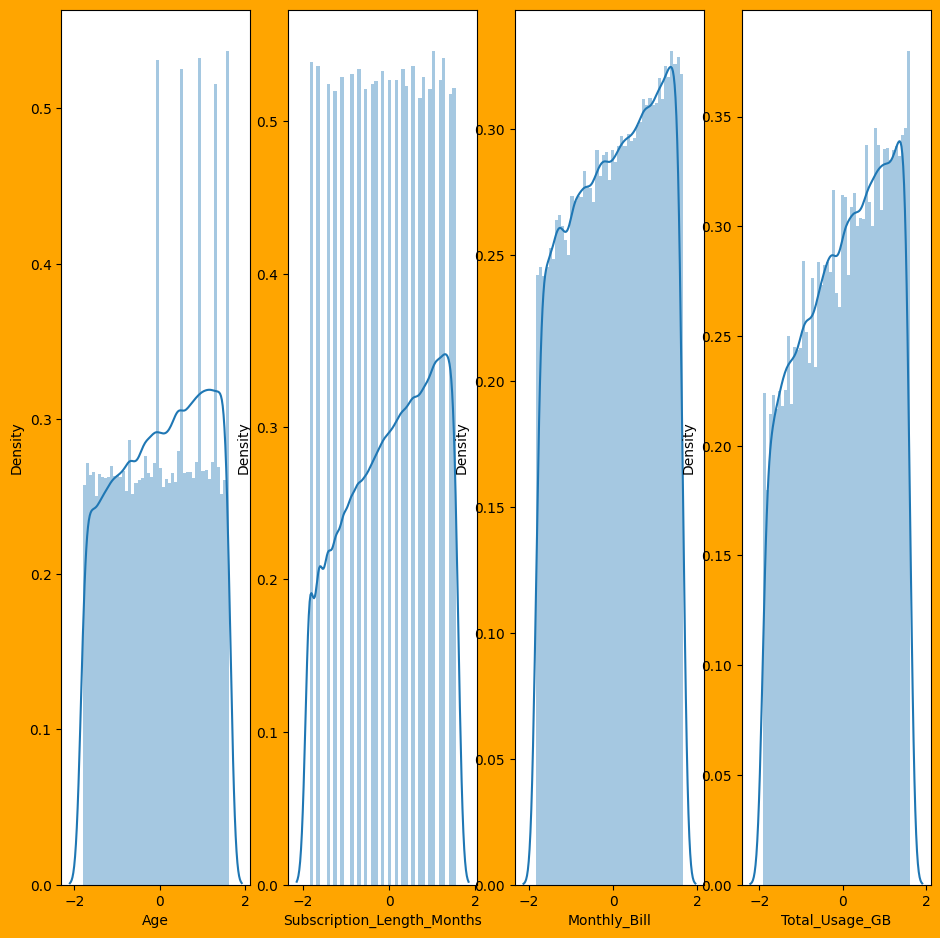

In [49]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='orange')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### We can see that the skewness have been removed and the graph is normalized now

# Now Lets Split the dataset into dependent and independent variable

In [50]:
df_new.head()


,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,1.214796,1,2,0.678973,0.440384,-0.221602,0
1,11112,1.155483,0,4,-1.849596,-0.784886,-0.737655,0
2,22223,-1.339627,0,2,-1.068915,1.004138,1.351158,0
3,33334,-0.487078,0,3,-1.431923,1.564033,0.235997,1
4,44445,0.170830,0,3,0.932817,-0.302743,0.006964,0


In [51]:
x=df_new.loc [:,df_new.columns != 'Churn']
# Independent Variable

In [52]:
y=df_new.loc[:,'Churn']
#Dependent Variable

In [53]:
x.shape,y.shape


((100000, 7), (100000,))

# Now Lets Scale The Dataset

In [65]:
from sklearn.preprocessing import StandardScaler


In [66]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,-1.732033,1.214796,1.004329,0.002947,0.678973,0.440384,-0.221602
1,-1.347103,1.155483,-0.995689,1.419748,-1.849596,-0.784886,-0.737655
2,-0.962206,-1.339627,-0.995689,0.002947,-1.068915,1.004138,1.351158
3,-0.577310,-0.487078,-0.995689,0.711347,-1.431923,1.564033,0.235997
4,-0.192414,0.170830,-0.995689,0.711347,0.932817,-0.302743,0.006964
...,...,...,...,...,...,...,...
99995,1.731930,-0.692756,1.004329,-0.705453,1.421216,-0.455190,-0.299490
99996,1.731964,1.155483,-0.995689,1.419748,0.932817,-0.127438,0.620288
99997,1.731999,1.273878,1.004329,-1.413854,0.678973,1.483042,-0.106404
99998,1.732033,0.486406,-0.995689,1.419748,1.057181,-0.759159,1.181486



#Model Training and testing




In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [70]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 7.357170977373428e-05
At random state 0,the testing accuracy is :- -0.00010848259099183188



At random state 1,the training accuracy is :- 5.100491588150291e-05
At random state 1,the testing accuracy is :- 3.833553694609915e-05



At random state 2,the training accuracy is :- 8.79927992071261e-05
At random state 2,the testing accuracy is :- -0.0001091636312329225



At random state 3,the training accuracy is :- 7.809033972283608e-05
At random state 3,the testing accuracy is :- -5.5758735389321856e-05



At random state 4,the training accuracy is :- 6.133285691289903e-05
At random state 4,the testing accuracy is :- -0.00010802855617741969



At random state 5,the training accuracy is :- 0.00011230175927434694
At random state 5,the testing accuracy is :- -0.00036758558038019196



At random state 6,the training accuracy is :- 8.463622478460664e-05
At random state 6,the testing accuracy is :- -0.00036854603644131956



At random state 7,the t

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)


In [72]:
lr.fit(x_train,y_train)


LinearRegression()

In [73]:
pred_test=lr.predict(x_test)
print (r2_score(y_test,pred_test))

-0.0002909577882275194


I can see that Linear Regression is not working fine

In [75]:
print (' **ERROR** ')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.5000353332734233
Mean Squared Error :-> 0.25007217678339316
Root Mean Squared Error :-> 0.500072171574657


Lets do CROSS VALIDATION of Linear Regression model

In [76]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,16):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -0.0001540598918617908 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.0002909577882275194



At cross fold 3 the cv score is -9.656824673479984e-05 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.0002909577882275194



At cross fold 4 the cv score is -5.97336093196843e-05 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.0002909577882275194



At cross fold 5 the cv score is -0.00021590247960259212 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.0002909577882275194



At cross fold 6 the cv score is -0.0002022855753947376 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.0002909577882275194



At cross fold 7 the cv score is -0.00032091321708354367 and accuracy score for training is -2.4661647701984535e-05 and accuracy for testing is -0.00029095778822

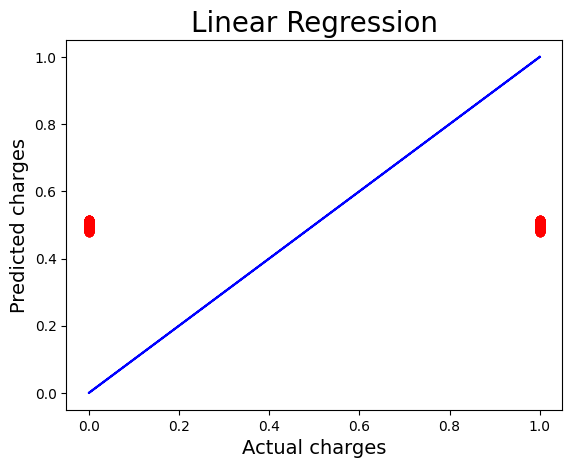

In [77]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

## Linear Regression is not performing well

# Lets Train with Another Regressor Model


In [79]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
dt=r2_score(y_test,predDTR)
print('R2_Score:',dt)

print('cv :-' ,cross_val_score(DTR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))



R2_Score: -1.0100045225101755
cv :- -0.9933260847326298
MAE: 0.5025
MSE: 0.5025
RMSE: 0.7088723439378912


In [80]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

predkn=kn.predict(x_test)
print('R2_Score:',r2_score(y_test,predkn))
print('MAE:',metrics.mean_absolute_error(y_test, predkn))
print('MSE:',metrics.mean_squared_error(y_test, predkn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predkn)))
print('cv :-' ,cross_val_score(kn,x,y,cv=5).mean())



R2_Score: -0.20179470403808408
MAE: 0.50056
MSE: 0.30044800000000005
RMSE: 0.5481313711146262
cv :- -0.19642988897013777


In [82]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))


R2_Score: -0.03544658975482662
MAE: 0.5003645
MSE: 0.25886106499999995
RMSE: 0.5087839079609338


In [83]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))


R2_Score: -0.0012279516555555592
MAE: 0.5000262979547713
MSE: 0.2503064247231661
RMSE: 0.5003063308845552


For me Gradient boosting is performing well so i will go ahead with Gradient Boosting

# Hyper parameter tuning

In [84]:
gb.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [86]:
#Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}

In [89]:
from sklearn.model_selection import GridSearchCV

gg=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)


In [90]:
gg.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [91]:
gg.best_params_


{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'warm_start': False}

In [92]:
gb = GradientBoostingRegressor(criterion='friedman_mse', warm_start=False, max_features='sqrt',loss='squared_error')
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)


R2_Score: -0.05051378363221115


# Now Save the model

In [93]:
#Saving the model using .pkl
import joblib
joblib.dump(gb,"CCP.pkl")

['CCP.pkl']

In [94]:
#Loading the saved model
aa=joblib.load("CCP.pkl")

In [95]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0.47428514, 0.5102774 , 0.5023672 , ..., 0.51159547, 0.48303047,
       0.47116072])

In [96]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
Predicted,0.474285,0.510277,0.502367,0.504309,0.501679,0.492164,0.503196,0.49753,0.509197,0.518124,...,0.501936,0.48829,0.49017,0.48188,0.499944,0.498831,0.497611,0.511595,0.48303,0.471161
Original,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,...,1.000000,0.00000,1.00000,1.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
